# Перед тем как мы начнем

В двух словах про Python

Тут будет лекция

In [167]:
print("Hello world")

Hello world


In [168]:
# Комментарий
# Назначеие переменных

my_var = 5

In [169]:
if my_var > 3:
    print("This is more than 3!")
else:
    print("Not yet")

This is more than 3!


Можно писать функции которые делают что-то, а потом просто и быстро вызывать их любое количество раз! 

In [170]:
def my_function(x):
    if x > 7:
        print("This is good")
    elif x > 3:
        print("so so")
    else:
        print("Not yet")

In [171]:
my_function(100)

This is good


# Разведочное исследование и поиск аномалий

У нас есть датасет с сотрудниками и некоторой информацией по ним. 

Задача: базово понять фактуру по этому датасету в течение короткого периода времени (20-30 минут), прикинуть какие-то направления для дальнейшего исследования.  

Исходный csv-файл взят отсюда:

https://www.kaggle.com/rhuebner/human-resources-data-set?select=HRDataset_v14.csv

In [172]:
2+2*2

6

In [173]:
# Импортируем первую библиотеку для работы с данными Pandas
import pandas as pd

In [174]:
# Загрузим CSV-файл с данными (CSV-файл должен лежать рядом с исполняемым блокнотом)
df_hr = pd.read_csv('livingwage (2).csv')

Существуют также методы для забора данных из Excel-файлов и БД

In [175]:
# Частично отрисуем этот датасет на экран
df_hr

,rank_2020,city,state,population_2020,population_2010,land_area_sqmi,density,one_adult_no_kids_living_wage,one_adult_one_kid_living_wage,one_adult_two_kids_living_wage,one_adult_three_kids_living_wage,two_adults_one_working_no_kids_living_wage,two_adults_one_working_one_kid_living_wage,two_adults_one_working_two_kids_living_wage,two_adults_one_working_three_kids_living_wage,two_adults_both_working_no_kids_living_wage,two_adults_both_working_one_kid_living_wage,two_adults_both_working_two_kids_living_wage,two_adults_both_working_three_kids_living_wage
0,1,New York,New York,8804190,8175133,300.5,29298,20.00,38.99,49.18,64.30,29.16,34.35,38.13,42.42,14.03,20.95,26.53,32.40
1,2,Los Angeles,California,3898747,3792621,469.5,8304,19.22,41.55,51.30,67.56,31.01,37.96,41.94,47.75,14.62,22.36,27.73,34.01
2,3,Chicago,Illinois,2746388,2695598,227.7,12061,16.08,32.25,40.20,51.69,25.41,29.73,33.38,35.93,12.28,17.52,22.01,25.94
3,4,Houston,Texas,2304580,2099451,640.4,3599,14.29,29.09,35.73,46.02,22.88,27.54,30.93,33.69,11.14,15.85,19.63,23.09
4,5,Phoenix,Arizona,1608139,1445632,518.0,3105,15.41,29.44,35.40,46.01,24.85,29.25,32.98,36.95,12.03,16.21,19.65,23.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Fremont,California,230504,214089,78.3,2944,21.88,46.59,58.15,76.92,34.27,41.18,45.16,51.65,17.14,24.88,31.16,38.69
96,97,Spokane,Washington,228989,208916,68.8,3328,12.69,27.13,34.19,44.94,20.97,25.56,29.11,32.17,10.15,14.98,18.95,22.68
97,98,Santa Clarita,California,228673,176320,70.8,3230,19.35,42.41,51.91,67.54,32.08,39.06,43.03,48.44,16.04,22.79,28.04,34.00
98,99,Baton Rouge,Louisiana,227470,229493,86.3,2636,13.99,29.24,35.69,45.02,23.23,28.25,31.90,33.82,11.32,16.02,19.74,22.60


In [176]:
"""

По умолчанию Pandas ограничивает датасеты при отрисовке, заменяя срединные значения в строках и столбцах на "...", 
чтобы в случае слишком большого датасета у вас был шанс его загрузить и отрбразить на экране без поломки. 

Причина -- отображение данных графически занимает гораздо больше ресурсов компьютера, чем математическая работа с ними. 
Учитывайте это при работе с большими датасетами.

В данном конкретном случае нам известно, что количество столбцов (да и строк тоже) в нашем датасете не слишком большое, 
при этом нам хотелось бы увидеть на экране столбцы и значения в них. 
Для этого можем поменять настройку отображения датафрейма в Pandas

"""

pd.options.display.max_columns = 999

# Теперь количество столбцов, которое мы увидим при отображении дисплея будет гораздо больше (до 999)

In [128]:
df_hr.head()
# Убедимся, что столбцов теперь отбражается больше

,rank_2020,city,state,population_2020,population_2010,land_area_sqmi,density,one_adult_no_kids_living_wage,one_adult_one_kid_living_wage,one_adult_two_kids_living_wage,one_adult_three_kids_living_wage,two_adults_one_working_no_kids_living_wage,two_adults_one_working_one_kid_living_wage,two_adults_one_working_two_kids_living_wage,two_adults_one_working_three_kids_living_wage,two_adults_both_working_no_kids_living_wage,two_adults_both_working_one_kid_living_wage,two_adults_both_working_two_kids_living_wage,two_adults_both_working_three_kids_living_wage
0,1,New York,New York,8804190,8175133,300.5,29298,20.00,38.99,49.18,64.30,29.16,34.35,38.13,42.42,14.03,20.95,26.53,32.40
1,2,Los Angeles,California,3898747,3792621,469.5,8304,19.22,41.55,51.30,67.56,31.01,37.96,41.94,47.75,14.62,22.36,27.73,34.01
2,3,Chicago,Illinois,2746388,2695598,227.7,12061,16.08,32.25,40.20,51.69,25.41,29.73,33.38,35.93,12.28,17.52,22.01,25.94
3,4,Houston,Texas,2304580,2099451,640.4,3599,14.29,29.09,35.73,46.02,22.88,27.54,30.93,33.69,11.14,15.85,19.63,23.09
4,5,Phoenix,Arizona,1608139,1445632,518.0,3105,15.41,29.44,35.40,46.01,24.85,29.25,32.98,36.95,12.03,16.21,19.65,23.23


In [129]:
# Проверим датасет на наличие пустых значений при помощи метода .info()

df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 19 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   rank_2020                                       100 non-null    int64  
 1   city                                            100 non-null    object 
 2   state                                           100 non-null    object 
 3   population_2020                                 100 non-null    int64  
 4   population_2010                                 100 non-null    int64  
 5   land_area_sqmi                                  100 non-null    float64
 6   density                                         100 non-null    int64  
 7   one_adult_no_kids_living_wage                   100 non-null    float64
 8   one_adult_one_kid_living_wage                   100 non-null    float64
 9   one_adult_two_kids_living_wage              


Мы проверили датасет на наличие пустых значений.


In [130]:
df_hr.describe()

,rank_2020,population_2020,population_2010,land_area_sqmi,density,one_adult_no_kids_living_wage,one_adult_one_kid_living_wage,one_adult_two_kids_living_wage,one_adult_three_kids_living_wage,two_adults_one_working_no_kids_living_wage,two_adults_one_working_one_kid_living_wage,two_adults_one_working_two_kids_living_wage,two_adults_one_working_three_kids_living_wage,two_adults_both_working_no_kids_living_wage,two_adults_both_working_one_kid_living_wage,two_adults_both_working_two_kids_living_wage,two_adults_both_working_three_kids_living_wage
count,100.000000,1.000000e+02,1.000000e+02,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.00000
mean,50.500000,6.500400e+05,5.978716e+05,178.54600,4869.340000,15.834400,32.654300,40.586400,52.928700,25.29410,30.283300,33.946500,37.514300,12.279300,17.755800,22.20950,26.61440
std,29.011492,9.825555e+05,9.213096e+05,209.84201,4283.033187,2.716893,5.444451,6.809935,9.425578,3.59775,4.457724,4.599372,5.996782,1.699192,2.787149,3.47464,4.75135
min,1.000000,2.266100e+05,1.763200e+05,14.70000,171.000000,12.400000,26.180000,31.690000,40.570000,20.97000,24.940000,28.360000,30.460000,10.150000,14.390000,17.61000,20.36000
25%,25.750000,2.822168e+05,2.468900e+05,66.65000,2498.500000,13.945000,29.190000,35.897500,46.607500,22.95500,27.267500,30.885000,33.507500,11.120000,16.010000,19.93500,23.45500
50%,50.500000,3.902635e+05,3.564605e+05,111.75000,3667.500000,15.080000,30.660000,38.060000,49.125000,24.12000,28.985000,32.410000,35.330000,11.845000,16.645000,20.94000,24.72000
75%,75.250000,6.445530e+05,6.004240e+05,203.12500,5199.500000,16.330000,33.932500,43.140000,57.007500,25.64500,31.240000,34.927500,38.752500,12.600000,18.392500,23.51000,28.68000
max,100.000000,8.804190e+06,8.175133e+06,1706.80000,29298.000000,25.120000,50.180000,61.690000,81.630000,37.33000,44.830000,48.810000,56.530000,17.370000,26.680000,32.93000,41.05000


In [131]:
# Pandas имеет еще один волшебный метод, который сразу считает матрицу корреляций по всему фрейму
df_hr.corr()

,rank_2020,population_2020,population_2010,land_area_sqmi,density,one_adult_no_kids_living_wage,one_adult_one_kid_living_wage,one_adult_two_kids_living_wage,one_adult_three_kids_living_wage,two_adults_one_working_no_kids_living_wage,two_adults_one_working_one_kid_living_wage,two_adults_one_working_two_kids_living_wage,two_adults_one_working_three_kids_living_wage,two_adults_both_working_no_kids_living_wage,two_adults_both_working_one_kid_living_wage,two_adults_both_working_two_kids_living_wage,two_adults_both_working_three_kids_living_wage
rank_2020,1.000000,-0.517547,-0.512952,-0.341817,-0.266624,-0.116528,-0.134800,-0.142510,-0.139766,-0.110596,-0.108916,-0.104480,-0.097500,-0.039732,-0.130646,-0.138805,-0.138481
population_2020,-0.517547,1.000000,0.999012,0.244862,0.579258,0.184872,0.161089,0.165182,0.156610,0.152059,0.140657,0.138251,0.126356,0.123339,0.158107,0.162260,0.157215
population_2010,-0.512952,0.999012,1.000000,0.241138,0.581486,0.181034,0.161381,0.166541,0.158075,0.150322,0.139568,0.137397,0.125002,0.120517,0.158487,0.163764,0.158648
land_area_sqmi,-0.341817,0.244862,0.241138,1.000000,-0.246518,-0.174995,-0.203959,-0.215911,-0.213287,-0.197008,-0.184449,-0.188215,-0.174306,-0.203863,-0.205514,-0.218575,-0.213241
density,-0.266624,0.579258,0.581486,-0.246518,1.000000,0.537997,0.517925,0.538398,0.529944,0.481819,0.457232,0.453240,0.435977,0.441682,0.512603,0.533652,0.531078
one_adult_no_kids_living_wage,-0.116528,0.184872,0.181034,-0.174995,0.537997,1.000000,0.958493,0.934151,0.927012,0.975425,0.962840,0.959321,0.953882,0.973980,0.957012,0.932285,0.927224
one_adult_one_kid_living_wage,-0.134800,0.161089,0.161381,-0.203959,0.517925,0.958493,1.000000,0.992737,0.988466,0.980088,0.980524,0.979570,0.968999,0.961687,0.999684,0.992443,0.988291
one_adult_two_kids_living_wage,-0.142510,0.165182,0.166541,-0.215911,0.538398,0.934151,0.992737,1.000000,0.998133,0.953141,0.951000,0.950844,0.938122,0.931911,0.992228,0.999725,0.997766
one_adult_three_kids_living_wage,-0.139766,0.156610,0.158075,-0.213287,0.529944,0.927012,0.988466,0.998133,1.000000,0.947138,0.944853,0.945384,0.937380,0.925317,0.988616,0.998428,0.999923
two_adults_one_working_no_kids_living_wage,-0.110596,0.152059,0.150322,-0.197008,0.481819,0.975425,0.980088,0.953141,0.947138,1.000000,0.995262,0.994845,0.989448,0.987366,0.981462,0.954041,0.947776


#Из представленного датасета невозможно проследить корреляцию в виду специфики данных.

In [132]:
# Проверим, сколько у нас уникальных значений в столбце
df_hr['city'].nunique()

100

In [133]:
df_hr['city'].unique()

array(['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix',
       'Philadelphia', 'San Antonio', 'San Diego', 'Dallas', 'San Jose',
       'Austin', 'Jacksonville', 'Fort Worth', 'Columbus', 'Indianapolis',
       'Charlotte', 'San Francisco', 'Seattle', 'Denver', 'Washington',
       'Nashville', 'Oklahoma City', 'El Paso', 'Boston', 'Portland',
       'Las Vegas', 'Detroit', 'Memphis', 'Louisville', 'Baltimore',
       'Milwaukee', 'Albuquerque', 'Tucson', 'Fresno', 'Sacramento',
       'Kansas City', 'Mesa', 'Atlanta', 'Omaha', 'Colorado Springs',
       'Raleigh', 'Long Beach', 'Virginia Beach', 'Miami', 'Oakland',
       'Minneapolis', 'Tulsa', 'Bakersfield', 'Wichita', 'Arlington',
       'Aurora', 'Tampa', 'New Orleans', 'Cleveland', 'Honolulu',
       'Anaheim', 'Lexington', 'Stockton', 'Corpus Christi', 'Henderson',
       'Riverside', 'Newark', 'Saint Paul', 'Santa Ana', 'Cincinnati',
       'Irvine', 'Orlando', 'Pittsburgh', 'St. Louis', 'Greensboro',
       'Jersey 

## Вопрос вопросов: 

А почему мы храним именно 0 и 1? 

In [134]:
"""

В любой ситуации (не только в Python) можно быстро прикинуть соотношение классов,
если у нас всего два класса, один из которых 0, а второй 1. 

Тогда Count() будет возвращать общий счетчик объектов, а Sum() сумму всех единиц, 
то есть их же количество. 

Разница между работой Sum() и Count() важный момент, запомните это. 

"""

'\n\nВ любой ситуации (не только в Python) можно быстро прикинуть соотношение классов,\nесли у нас всего два класса, один из которых 0, а второй 1. \n\nТогда Count() будет возвращать общий счетчик объектов, а Sum() сумму всех единиц, \nто есть их же количество. \n\nРазница между работой Sum() и Count() важный момент, запомните это. \n\n'

In [135]:
df_hr['city'].count()

100

In [136]:
df_hr['state'].count()

100

In [137]:
# Значит у нас есть 135 объектов со значением GenderID "1" и 311-135 объектов с GenderID знеачением "0"

In [138]:
df_hr['population_2020'].sum()

65003996

In [139]:
#Значит всего на 2020 год население сотсавляет 650003996

In [140]:
# Чаще используется метод .head(), который возвращает только первые несколько строк (количество строк передается в скобках)
df_hr.head(10)

,rank_2020,city,state,population_2020,population_2010,land_area_sqmi,density,one_adult_no_kids_living_wage,one_adult_one_kid_living_wage,one_adult_two_kids_living_wage,one_adult_three_kids_living_wage,two_adults_one_working_no_kids_living_wage,two_adults_one_working_one_kid_living_wage,two_adults_one_working_two_kids_living_wage,two_adults_one_working_three_kids_living_wage,two_adults_both_working_no_kids_living_wage,two_adults_both_working_one_kid_living_wage,two_adults_both_working_two_kids_living_wage,two_adults_both_working_three_kids_living_wage
0,1,New York,New York,8804190,8175133,300.5,29298,20.00,38.99,49.18,64.30,29.16,34.35,38.13,42.42,14.03,20.95,26.53,32.40
1,2,Los Angeles,California,3898747,3792621,469.5,8304,19.22,41.55,51.30,67.56,31.01,37.96,41.94,47.75,14.62,22.36,27.73,34.01
2,3,Chicago,Illinois,2746388,2695598,227.7,12061,16.08,32.25,40.20,51.69,25.41,29.73,33.38,35.93,12.28,17.52,22.01,25.94
3,4,Houston,Texas,2304580,2099451,640.4,3599,14.29,29.09,35.73,46.02,22.88,27.54,30.93,33.69,11.14,15.85,19.63,23.09
4,5,Phoenix,Arizona,1608139,1445632,518.0,3105,15.41,29.44,35.40,46.01,24.85,29.25,32.98,36.95,12.03,16.21,19.65,23.23
5,6,Philadelphia,Pennsylvania,1603797,1526006,134.4,11933,14.47,30.17,38.31,49.53,22.94,27.23,30.64,33.12,10.97,16.42,20.95,25.00
6,7,San Antonio,Texas,1434625,1327407,498.8,2876,13.47,28.67,35.22,44.94,22.46,27.21,30.61,32.89,10.73,15.64,19.38,22.55
7,8,San Diego,California,1386932,1307402,325.9,4256,19.63,41.41,50.88,67.95,30.89,38.10,42.08,48.98,14.84,22.29,27.52,34.21
8,9,Dallas,Texas,1304379,1197816,339.6,3841,15.00,30.51,37.35,48.03,23.84,28.74,32.14,35.07,11.50,16.56,20.44,24.10
9,10,San Jose,California,1013240,945942,178.3,5683,25.12,50.18,61.69,81.63,37.33,44.83,48.81,56.53,17.37,26.68,32.93,41.05


##  Сейчас будет чуть сложнее

In [141]:
# Определим типы данных в столбцах

df_hr.dtypes

rank_2020                                           int64
city                                               object
state                                              object
population_2020                                     int64
population_2010                                     int64
land_area_sqmi                                    float64
density                                             int64
one_adult_no_kids_living_wage                     float64
one_adult_one_kid_living_wage                     float64
one_adult_two_kids_living_wage                    float64
one_adult_three_kids_living_wage                  float64
two_adults_one_working_no_kids_living_wage        float64
two_adults_one_working_one_kid_living_wage        float64
two_adults_one_working_two_kids_living_wage       float64
two_adults_one_working_three_kids_living_wage     float64
two_adults_both_working_no_kids_living_wage       float64
two_adults_both_working_one_kid_living_wage       float64
two_adults_bot

 

В данной таблице находятся следующие типы данных: 
* int64
* float64
* object

## Важно: в Python (почти) всё является объектом

Далее займемся занимательным рисованием

In [142]:
# Импортируем библиотеки для рисования

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

<AxesSubplot:xlabel='one_adult_no_kids_living_wage'>

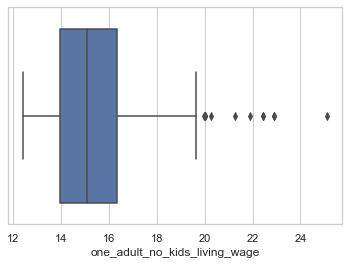

In [143]:
# Нарисуем боксплот для семей с одним работающим родителем и 1 ребенком
sns.boxplot(x=df_hr["one_adult_no_kids_living_wage"])

In [144]:
# Видим, что распределение смещено, все выбросы находятся справа.

Text(0, 0.5, 'density')

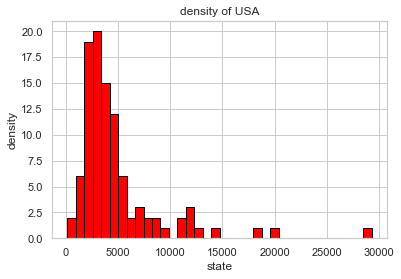

In [145]:
# matplotlib histogram
plt.hist(df_hr['density'], color = 'red', edgecolor = 'black',
         bins = int(180/5))

# Add labels
plt.title('density of USA')
plt.xlabel('state')
plt.ylabel('density')

In [146]:
import numpy as np

In [147]:
# Среднее значение по зарплате
np.mean(df_hr.density)

4869.34

In [148]:
# А медиана? 
np.median(df_hr.density)

3667.5

In [149]:
# Variance (дисперсия) зарплат
np.var(df_hr.density)

18160929.544400003

In [150]:
# Среднеквадратическое отклонение (также это корень из дисперсии)
np.std(df_hr.density)

4261.564213337633

In [151]:
3*np.std(df_hr.density)

12784.6926400129

In [152]:
# Данных для рассчета и анализа подвыборки недостаточно. 

# Поиск аномальных значений

Для начала, определимся какие значения в принципе могут быть названы аномальными. 

Предположим, что это могут быть: 
* Сотрудники, у которых количество отсутствий больше, чем у 90% нашего персонала 
* Сотрудники, обладающие зарплатой значительно ниже или выше основной массы персонала


Классически "выбросами" считаются значения за пределами трех среднеквадратических отклонений от медианного значения в выборке. Можно быстро вывести их на экран банальным боксплотом и посмотреть есть они вообще или нет. Обычно в таком графике все "точки" за пределами "усов" "ящика" являются выбросами. 

К сожалению расчеты боксплотов могут отличаться в разных реализациях. 

In [153]:
# Эффективно выделим кусок данных через numpy where

df_hr['anomally_one_adult_no_kids_living_wage'] = np.where(
                            df_hr['one_adult_no_kids_living_wage'] > 
                            np.mean(df_hr.one_adult_no_kids_living_wage) + 3*np.std(df_hr.one_adult_no_kids_living_wage),                 
                            1, 0)

In [154]:
df_anomally_wage = df_hr[df_hr['one_adult_no_kids_living_wage'] == 1]

df_anomally_wage

,rank_2020,city,state,population_2020,population_2010,land_area_sqmi,density,one_adult_no_kids_living_wage,one_adult_one_kid_living_wage,one_adult_two_kids_living_wage,one_adult_three_kids_living_wage,two_adults_one_working_no_kids_living_wage,two_adults_one_working_one_kid_living_wage,two_adults_one_working_two_kids_living_wage,two_adults_one_working_three_kids_living_wage,two_adults_both_working_no_kids_living_wage,two_adults_both_working_one_kid_living_wage,two_adults_both_working_two_kids_living_wage,two_adults_both_working_three_kids_living_wage,anomally_one_adult_no_kids_living_wage


In [155]:
#Аномальных значений нет.

(array([ 8., 38., 21., 11.,  4.,  5.,  7.,  0.,  3.,  3.]),
 array([31.69, 34.69, 37.69, 40.69, 43.69, 46.69, 49.69, 52.69, 55.69,
        58.69, 61.69]),
 <BarContainer object of 10 artists>)

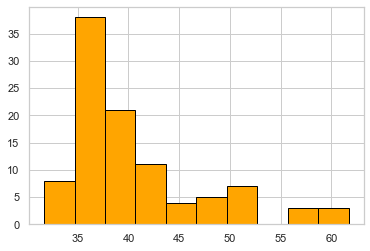

In [156]:
plt.hist(df_hr['one_adult_two_kids_living_wage'], color = 'orange', edgecolor = 'black', bins = 10)

Прожиточный минимум 75% семей с двумя детьми и одним родителем сосредоточены на уровне 3,5-4,0 тысяч USD.



In [165]:
df_hr.one_adult_two_kids_living_wage.quantile(q=0.9)

51.3

Это означает, что прожиточный минимум 90% семей c двумя родителями и одним родителем из датасета составляет около 51,3 USD.

In [ ]:
#Датасет содержит информацию о прожиточном минимуме разных по размеру семей в 100 городах Америки.Пустых значений в датасете нет.
#Исходя из проведенного анализа можно сделать вывод о том что в 75% семей с двумя детьми и одним родителем составляет примерно 3,5-4,0 USD.
#прожиточный минимум 90% семей c двумя родителями и одним родителем из датасета составляет около 51,3 USD.
#Аномальных значений среди семей с одним родителем и без детей не наблюдается.